In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# **------------------------- THE CONTEXT ----------------------------------------**

Before we begin our project, we have to understand the data and the problem, what is the problem that we want to solve? is the data ready to process or we have to clean it? and so on. So let's break it down:

**The Data**

The data came from The Flotation Plant. The data have several columns,the first column is date, the second and third columns are quality measures of the iron ore pulp right before it is fed into the flotation plant. Column 4 until column 8 are the most important variables that impact in the ore quality in the end of the process. From column 9 until column 22, we can see process data (level and air flow inside the flotation columns, which also impact in ore quality. The last two columns are the final iron ore pulp quality measurement from the lab. 

**The Problem**
1. The aim is to predict the % Silica in Concentrate ever minute
2. can we predict % Silica in Concentrate without using % Iron Concentrate?

**The Steps**
1. Data Preprocessing
2. Modelling 
3. Evaluating
4. Tunning Model

# 1. Data Preprocessing

In [2]:
#Importing all libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the data, so we have to convert the date column into date 
# and we have to drop the duplicates entries/row using code below

data =  pd.read_csv(r"C:\Users\Asus\Desktop\Data Science\Project\Flotation\MiningProcess_Flotation_Plant_Database.csv",
                   decimal=",",
                    parse_dates=["date"],
                    infer_datetime_format=True).drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 736282 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   date                          736282 non-null  datetime64[ns]
 1   % Iron Feed                   736282 non-null  float64       
 2   % Silica Feed                 736282 non-null  float64       
 3   Starch Flow                   736282 non-null  float64       
 4   Amina Flow                    736282 non-null  float64       
 5   Ore Pulp Flow                 736282 non-null  float64       
 6   Ore Pulp pH                   736282 non-null  float64       
 7   Ore Pulp Density              736282 non-null  float64       
 8   Flotation Column 01 Air Flow  736282 non-null  float64       
 9   Flotation Column 02 Air Flow  736282 non-null  float64       
 10  Flotation Column 03 Air Flow  736282 non-null  float64       
 11  Flotation Col

In [4]:
#Check the shape of data (row and column)
data.shape

(736282, 24)

In [5]:
#check the data if there any missing value or not
data.isnull().sum()

date                            0
% Iron Feed                     0
% Silica Feed                   0
Starch Flow                     0
Amina Flow                      0
Ore Pulp Flow                   0
Ore Pulp pH                     0
Ore Pulp Density                0
Flotation Column 01 Air Flow    0
Flotation Column 02 Air Flow    0
Flotation Column 03 Air Flow    0
Flotation Column 04 Air Flow    0
Flotation Column 05 Air Flow    0
Flotation Column 06 Air Flow    0
Flotation Column 07 Air Flow    0
Flotation Column 01 Level       0
Flotation Column 02 Level       0
Flotation Column 03 Level       0
Flotation Column 04 Level       0
Flotation Column 05 Level       0
Flotation Column 06 Level       0
Flotation Column 07 Level       0
% Iron Concentrate              0
% Silica Concentrate            0
dtype: int64

In [6]:
#Display the data, and observe what kind of the data is this
data.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


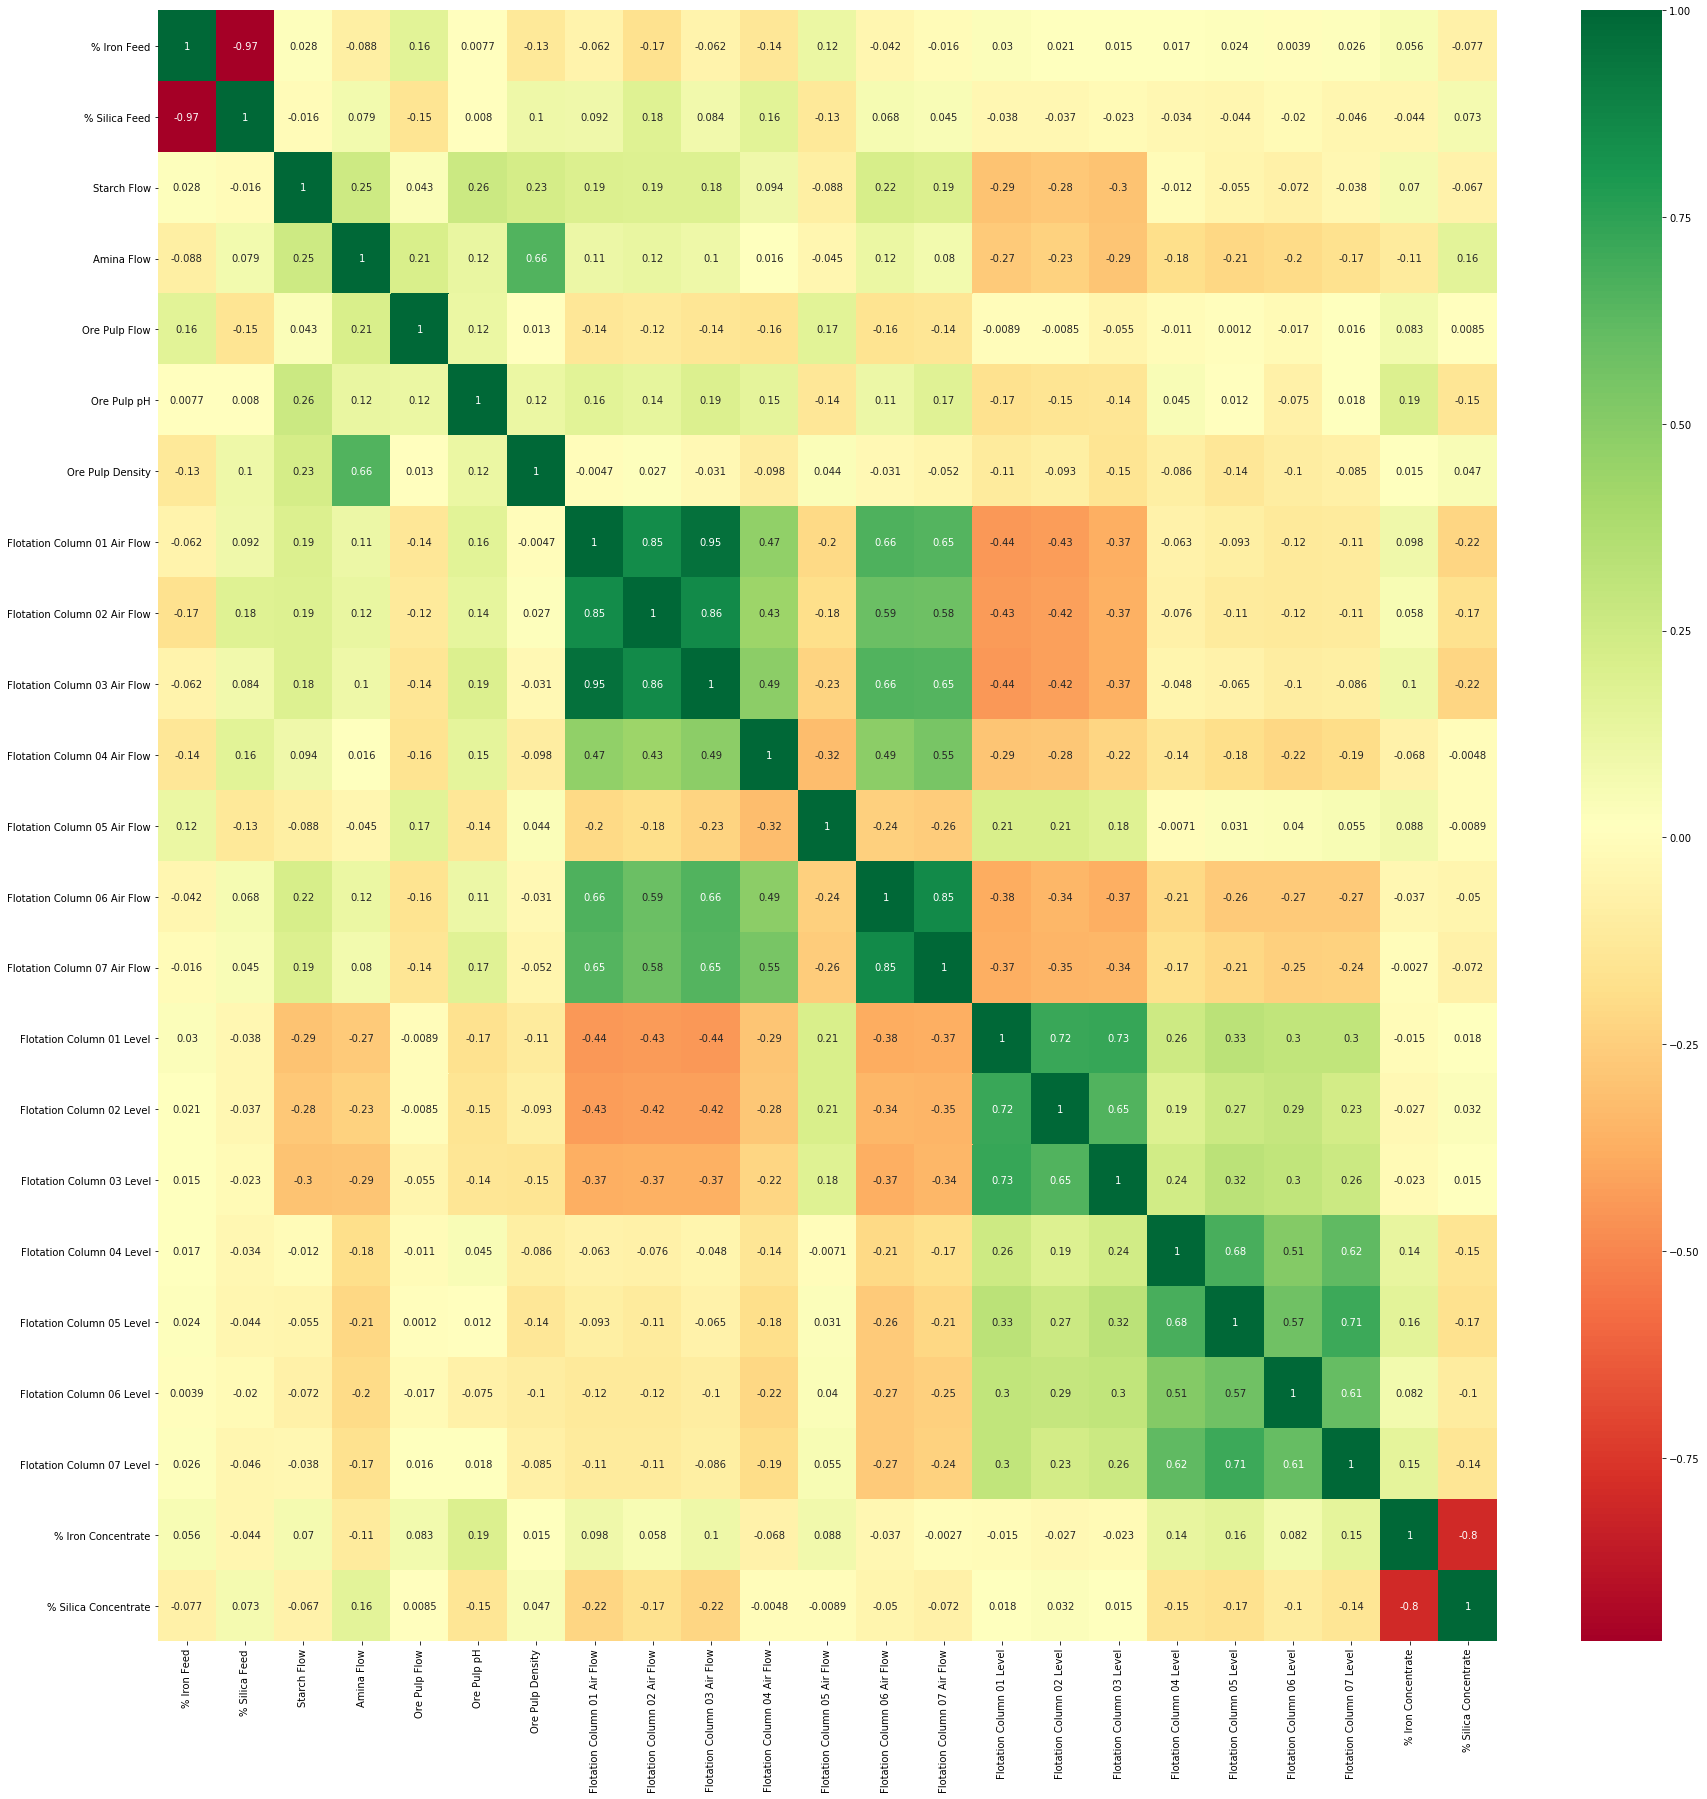

In [7]:
#We use heatmap to visualize the corealtion between each features

plt.figure(figsize=(30, 30))
cor= data.corr()
corelation = sns.heatmap(cor, annot=True, cmap="RdYlGn")

In [8]:
#Drop data that there are no significant corelation on dependent feature
#Make Correlation with output variable
cor_target = abs(cor["% Silica Concentrate"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.15]
relevant_features

Amina Flow                      0.156981
Flotation Column 01 Air Flow    0.219076
Flotation Column 02 Air Flow    0.167259
Flotation Column 03 Air Flow    0.218834
Flotation Column 05 Level       0.168466
% Iron Concentrate              0.800598
% Silica Concentrate            1.000000
Name: % Silica Concentrate, dtype: float64

In [9]:
#We pick the 2 biggest corelation exclude target
relevant_features = relevant_features.nlargest(n=3)

In [10]:
#Make a data from the relevant features
data = pd.DataFrame(data, columns=relevant_features.index)
data.head()

,% Silica Concentrate,% Iron Concentrate,Flotation Column 01 Air Flow
0,1.31,66.91,249.214
1,1.31,66.91,249.719
2,1.31,66.91,249.741
3,1.31,66.91,249.917
4,1.31,66.91,250.203


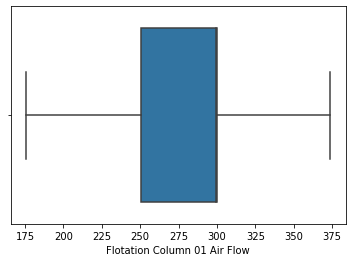

In [11]:
#Checking The Outlier in our data
sns.boxplot(data['Flotation Column 01 Air Flow'])

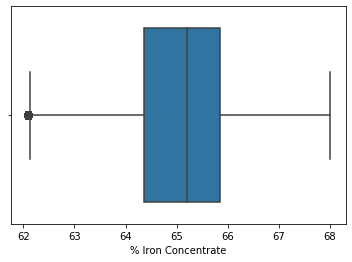

In [12]:
#Checking The Outlier in our data
sns.boxplot(data['% Iron Concentrate'])

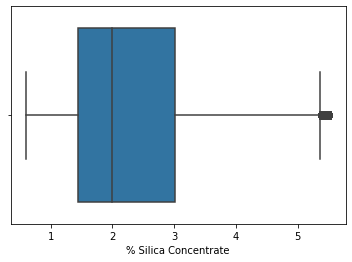

In [13]:
#Checking The Outlier in our data
sns.boxplot(data['% Silica Concentrate'])

In [14]:
#Dropping the outlier with Percentiles
for i in data:
    upper_lim = data[i].quantile(.95)
    lower_lim = data[i].quantile(.05)

    data = data[(data[i] < upper_lim) & (data[i] > lower_lim)]

In [15]:
# Before we split into train and test data, as we can see, the data have differents in units and magnitude
# So to make it at the same magnitude we can scaling the data

y = data['% Silica Concentrate']
X = data.drop(['% Silica Concentrate'], axis=1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [16]:
# After we scaled the data, and the data have the same magnitude
# we can split the data into Train & Test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    y,
                                                    test_size=0.3,
                                                   random_state=30)

# 2. Modelling

**Linear Regression**

In [17]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_linreg = lin_reg.predict(X_test)

**Ridge Regression**

In [18]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)
y_pred_ridge = ridge_regressor.predict(X_test)

**Lasso Regression**

In [19]:
from sklearn.linear_model import Lasso

lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X_train,y_train)
y_pred_lasso = lasso_regressor.predict(X_test)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 753.7708097891591, tolerance: 23.05202960153537
  positive)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10976.911201696785, tolerance: 23.04613479320952
  positive)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1535.0468939294515, tolerance: 23.046591065468483
  positive)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality ga

**XGBoost**

In [20]:
import xgboost as xgb
xgb = xgb.XGBRegressor(objective="reg:linear", random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

[08:03:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


# 3. Evaluation

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

#LINEAR REGRESSION
MSE = mean_squared_error(y_test, y_pred_linreg)
print('Our Linear Regression mean squared error is: ',MSE)
MAE = mean_absolute_error(y_test, y_pred_linreg)
print('Our Linear Regression mean absolute error is: ',MAE)
R2 = r2_score(y_test, y_pred_linreg) 
print('Our Linear Regression R2 score is: ', R2)
print('Our Linear Regreesion Root Mean Squared Error is:', np.sqrt(mean_squared_error(y_test, y_pred_linreg)))
print('-'*100)
print('-'*100)
#RIDGE REGRESSION
MSE = mean_squared_error(y_test, y_pred_ridge)
print('Our Rdige Regression mean squared error is: ',MSE)
MAE = mean_absolute_error(y_test, y_pred_ridge)
print('Our Ridge Regression mean absolute error is: ',MAE)
R2 = r2_score(y_test, y_pred_ridge) 
print('Our Ridge Regression R2 score is: ', R2)
print('Our Ridge Regression Root Mean Squared Error is:', np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print('-'*100)
print('-'*100)
#LASSO REGRESSION
MSE = mean_squared_error(y_test, y_pred_lasso)
print('Our Lasso Regression mean squared error is: ',MSE)
MAE = mean_absolute_error(y_test, y_pred_lasso)
print('Our Lasso Regression mean absolute error is: ',MAE)
R2 = r2_score(y_test, y_pred_lasso) 
print('Our Lasso Regression R2 score is: ', R2)
print('Our Lasso Regression Root Mean Squared Error is:', np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print('-'*100)
print('-'*100)
#XGBOOST
MSE = mean_squared_error(y_test, y_pred_xgb)
print('Our XGBoost mean squared error is: ',MSE)
MAE = mean_absolute_error(y_test, y_pred_xgb)
print('Our XGBoost mean absolute error is: ',MAE)
R2 = r2_score(y_test, y_pred_xgb) 
print('Our XGBoost R2 score is: ', R2)
print('Our XGBoost Root Mean Squared Error is:', np.sqrt(mean_squared_error(y_test, y_pred_xgb)))

Our Linear Regression mean squared error is:  0.3474323919345133
Our Linear Regression mean absolute error is:  0.4574184735544689
Our Linear Regression R2 score is:  0.5449059569937885
Our Linear Regreesion Root Mean Squared Error is: 0.5894339589254366
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Our Rdige Regression mean squared error is:  0.3474323842416702
Our Ridge Regression mean absolute error is:  0.45741843368906543
Our Ridge Regression R2 score is:  0.5449059670704743
Our Ridge Regression Root Mean Squared Error is: 0.5894339523998174
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Our Lasso Regression mean squared error is:  0.3474323918898883
Our Lasso Regression mean

In [22]:
#Cecking Multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=X_train.columns).T

,% Iron Concentrate,Flotation Column 01 Air Flow
vif,1.000079,1.000079


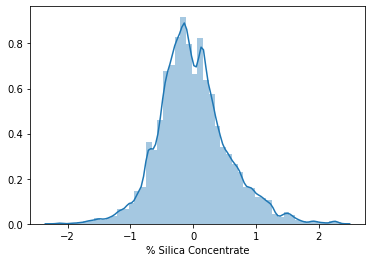

In [23]:
#Checking Normality
residual = y_test - y_pred_xgb
sns.distplot(residual)

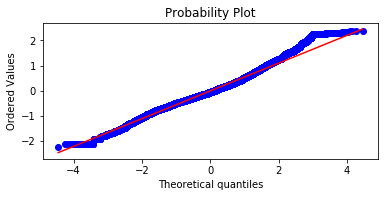

In [24]:
#Checking Normality
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

Text(0.5, 1.0, 'Residual Plot')

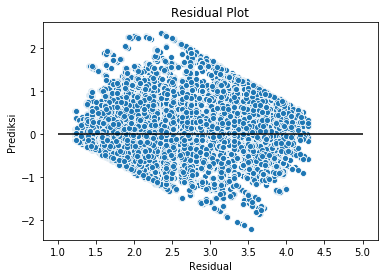

In [25]:
#Checking Homoscedacity
sns.scatterplot(y_pred_xgb, residual)
plt.hlines(y=0, xmin= 1, xmax=5)
plt.xlabel('Residual')
plt.ylabel('Prediksi')
plt.title('Residual Plot')

# 4. Tunning Model

In [26]:
# Hyper Parameter Tunning
from sklearn.model_selection import RandomizedSearchCV

params={
 "learning_rate"    : [0.01, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7, 0.9, 1.0 ]
    
}

In [27]:
#Using Randomized Search CV to look the best parameter
random_search= RandomizedSearchCV(estimator=xgb,
                                param_distributions=params,
                                cv=5, n_iter=50,
                                scoring = 'r2',n_jobs = 4,
                                verbose = 1, 
                                return_train_score = True,
                                random_state=42)

In [28]:
#Train Hyperparameter into our Data
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 17.8min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed: 81.5min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 102.9min finished


[09:46:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=42, reg_alpha...
                                          verbosity=1),
                   iid='deprecated', n_iter=50, n_jobs=4,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5

In [29]:
#Ceck the best estimator
random_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1.0, gamma=0.2,
             importance_type='gain', learning_rate=0.25, max_delta_step=0,
             max_depth=10, min_child_weight=7, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [32]:
#Using the best hyperparameter into our model
import xgboost as xgb
xgb = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1.0, gamma=0.2,
             importance_type='gain', learning_rate=0.25, max_delta_step=0,
             max_depth=10, min_child_weight=7, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

xgb.fit(X_train, y_train)
y_pred_xgb_tunning = xgb.predict(X_test)

[10:13:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [33]:
#Check Metrics after tunning
MSE = mean_squared_error(y_test, y_pred_xgb_tunning)
print('Our XGBoost after tunning mean squared error is: ',MSE)
MAE = mean_absolute_error(y_test, y_pred_xgb_tunning)
print('Our XGBoost after tunning mean absolute error is: ',MAE)
R2 = r2_score(y_test, y_pred_xgb_tunning) 
print('Our XGBoost after tunning R2 score is: ', R2)
print('Our XGBoost after tunning Root Mean Squared Error is:', np.sqrt(mean_squared_error(y_test, y_pred_xgb_tunning)))

Our XGBoost after tunning mean squared error is:  0.2351135114584078
Our XGBoost after tunning mean absolute error is:  0.35646584059459063
Our XGBoost after tunning R2 score is:  0.6920299863256216
Our XGBoost after tunning Root Mean Squared Error is: 0.48488504973695346


In [34]:
#Visualize The Actual Data and our Prediction
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_xgb_tunning})
result.head(20)

,Actual,Predicted
65750,3.040000,3.266945
538991,3.120000,2.569989
496489,1.210000,1.660527
541623,3.710000,2.423221
421087,2.210000,1.947904
551281,4.570000,3.801207
500937,2.010000,3.054207
391225,2.400000,2.257399
646696,4.696579,3.720869
280795,1.190000,1.495036


C:\Users\Asus\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


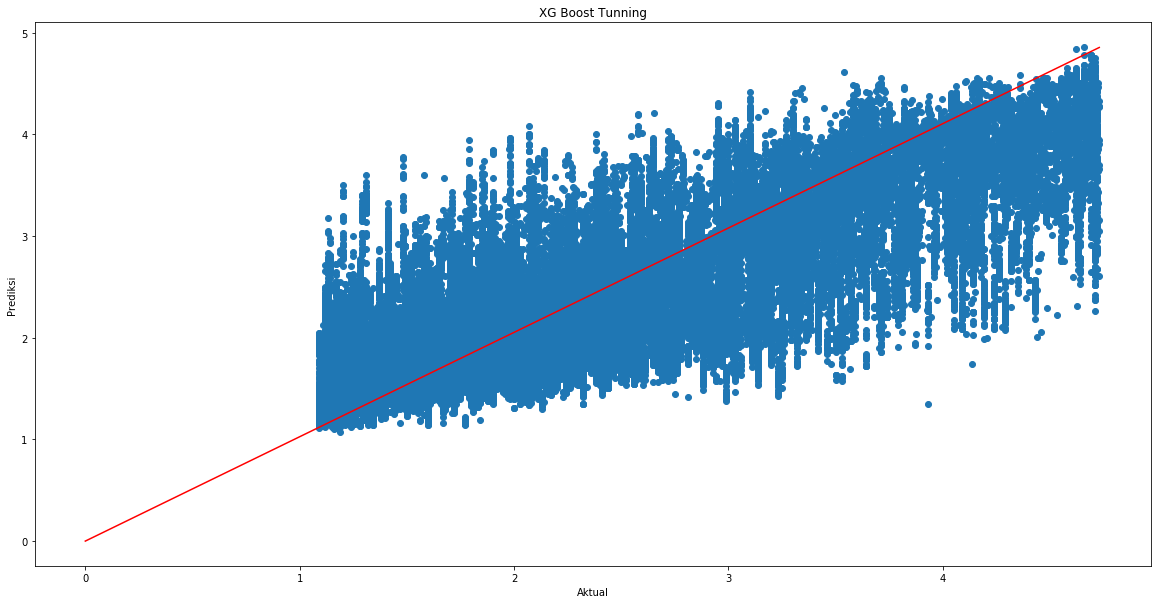

In [35]:
#Visualize using scatter plot
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ax.set(title="XG Boost Tunning", xlabel="Aktual", ylabel="Prediksi")
ax.scatter(y_test, y_pred_xgb_tunning)
ax.plot([0,max(y_test)], [0,max(y_pred_xgb_tunning)], color='r')
fig.show()